In [1]:
#Подключение библиотек и скриптов

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, KFold, GridSearchCV

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

import xgboost as xgb
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error as mse, r2_score as r2


In [2]:
#Пути к директориям и файлам

TRAIN_DATASET_PATH = 'https://raw.githubusercontent.com/Strukov0107/Python-for-Data-Science/main/Data_For_Project/train.csv'
TEST_DATASET_PATH = 'https://raw.githubusercontent.com/Strukov0107/Python-for-Data-Science/main/Data_For_Project/test.csv'
SAMPLE_SUBMITION_PATH = 'https://raw.githubusercontent.com/Strukov0107/Python-for-Data-Science/main/Data_For_Project/sample_submission.csv'

#Загрузка данных
#для начала проанализируем тренировочные данные

df_train = pd.read_csv(TRAIN_DATASET_PATH)
#df_test = pd.read_csv(TEST_DATASET_PATH)

#покажем тренировочные данные
#df_train

In [141]:
#df_train.dtypes   #покажем название колонок и тип данных в них

#Описание датасета

#Id - идентификационный номер квартиры
#DistrictId - идентификационный номер района
#Rooms - количество комнат
#Square - площадь
#LifeSquare - жилая площадь
#KitchenSquare - площадь кухни
#Floor - этаж
#HouseFloor - количество этажей в доме
#HouseYear - год постройки дома
#Ecology_1, Ecology_2, Ecology_3 - экологические показатели местности
#Social_1, Social_2, Social_3 - социальные показатели местности
#Healthcare_1, Helthcare_2 - показатели местности, связанные с охраной здоровья
#Shops_1, Shops_2 - показатели, связанные с наличием магазинов, торговых центров
#Price - цена квартиры

In [3]:
#заменим категорийные значения колонок с буквенных значений на цифровые
binary_to_numbers = {'A': 0, 'B': 1}

df_train['Ecology_2'] = df_train['Ecology_2'].replace(binary_to_numbers)
df_train['Ecology_3'] = df_train['Ecology_3'].replace(binary_to_numbers)
df_train['Shops_2'] = df_train['Shops_2'].replace(binary_to_numbers)

In [4]:
#избавимся от пропусков данных в столбце Healthcare_1

# создадим df_drop, по которой будем потом соединять файлы,  
df_drop = df_train[['Id', 'LifeSquare']]

target_name = 'Healthcare_1'
df_train.drop(['LifeSquare'], axis=1, inplace=True)

#df_drop.head()

#введём новую колонку 'nan' по которой разделим файл на две части
df_train['nan'] = 0
df_train.loc[df_train['Healthcare_1'].isna(), 'nan'] =1

#один файл будет с значениями Healthcare_1, а другой с пропусками
df_test1 = df_train[df_train['nan'] ==1]
df_train1 = df_train[df_train['nan'] ==0]

X = df_train1.drop(columns=[target_name])
y = df_train1[target_name]

In [5]:
#обучим модель  Random Forest №1

#создадим модель
model_rf1 = RandomForestRegressor(random_state=21, criterion='mse')

#обучение модели на полных данных
model_rf1.fit(X, y)


/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


RandomForestRegressor(criterion='mse', random_state=21)

In [6]:
df_test1 = df_test1.drop(columns=target_name)
#предсказание данных
df_test1[target_name] = model_rf1.predict(df_test1)

df_test1 = df_test1.drop(columns='nan')

#переведём полученные значения Healthcare_1 в целые числа
df_test1[target_name] = df_test1[target_name].apply(int)
#df_test1.head()

#объединим полученные результаты в общий файл с данными
df_train1 = df_train1.drop(columns='nan')
df2_merged = pd.merge(df_test1, df_train1, how='outer') 
df3_merged = pd.merge(df_drop, df2_merged, how='left')

#расположим столбцы в первоначальном порядке
df_train = df3_merged.reindex(columns=['Id', 'DistrictId', 'Rooms', 'Square', 'LifeSquare', 'KitchenSquare', 'Floor', 'HouseFloor', 'HouseYear', 'Ecology_1', 'Ecology_2', 'Ecology_3', 'Social_1', 'Social_2', 'Social_3', 'Healthcare_1', 'Helthcare_2', 'Shops_1', 'Shops_2', 'Price'])

In [7]:
#избавимся от пропусков данных в столбце LifeSquare

# создадим df_drop, по которой будем потом соединять файлы,  
df_drop = df_train[['Id', 'Healthcare_1']]

target_name = 'LifeSquare'
df_train.drop(['Healthcare_1'], axis=1, inplace=True)

#введём новую колонку 'nan' по которой разделим файл на две части
df_train['nan'] = 0
df_train.loc[df_train['LifeSquare'].isna(), 'nan'] =1

#один файл будет с значениями LifeSquare, а другой с пропусками
df_test1 = df_train[df_train['nan'] ==1]
df_train1 = df_train[df_train['nan'] ==0]

X = df_train1.drop(columns=[target_name])
y = df_train1[target_name]

#обучим модель  Random Forest №2

#создадим модель
model_rf2 = RandomForestRegressor(random_state=21, criterion='mse')

#обучение модели на полных данных
model_rf2.fit(X, y)

df_test1 = df_test1.drop(columns=target_name)
#предсказание данных
df_test1[target_name] = model_rf2.predict(df_test1)

df_test1 = df_test1.drop(columns='nan')

#объединим полученные результаты в общий файл с данными
df_train1 = df_train1.drop(columns='nan')
df2_merged = pd.merge(df_test1, df_train1, how='outer') 
df3_merged = pd.merge(df_drop, df2_merged, how='left')

#расположим столбцы в первоначальном порядке
df_train = df3_merged.reindex(columns=['Id', 'DistrictId', 'Rooms', 'Square', 'LifeSquare', 'KitchenSquare', 'Floor', 'HouseFloor', 'HouseYear', 'Ecology_1', 'Ecology_2', 'Ecology_3', 'Social_1', 'Social_2', 'Social_3', 'Healthcare_1', 'Helthcare_2', 'Shops_1', 'Shops_2', 'Price'])

/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


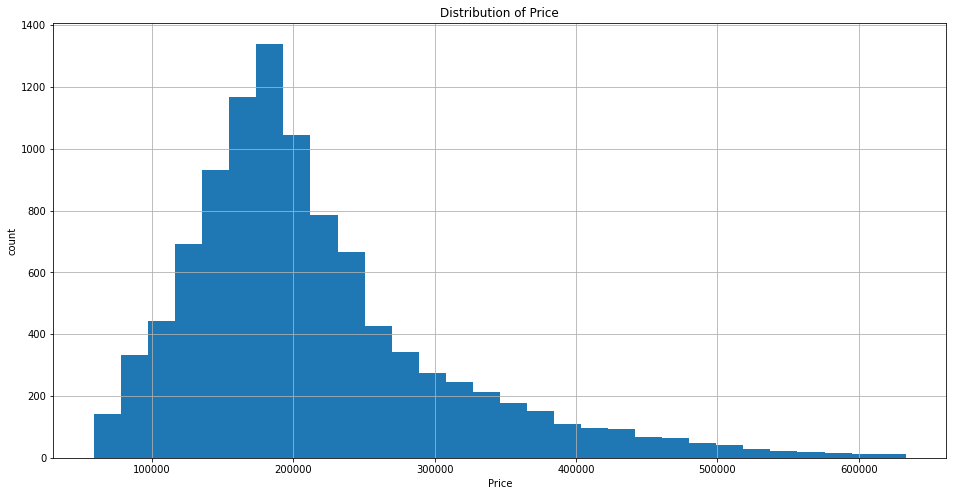

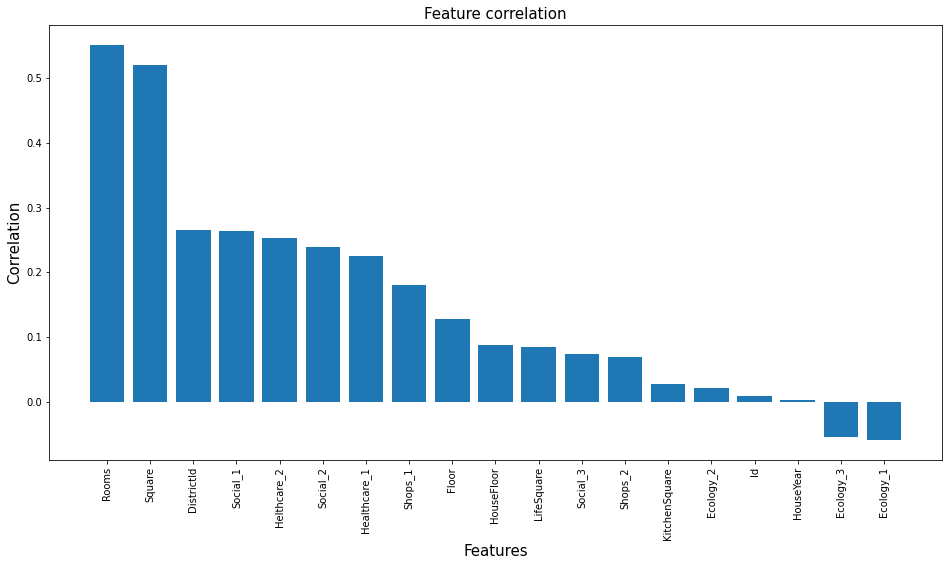

In [8]:
#Посмотрим на распределение цен
plt.figure(figsize = (16, 8))

df_train['Price'].hist(bins=30)
plt.ylabel('count')
plt.xlabel('Price')

plt.title('Distribution of Price')
plt.show()

#посмотрим на зависимость цен на квартиры от других параметров

correlation = df_train.corrwith(df_train['Price']).sort_values(ascending=False)
correlation.drop('Price', inplace=True)

plt.figure(figsize = (16, 8))
plt.bar(correlation.index, correlation)
plt.xticks(rotation='90')
plt.xlabel('Features', fontsize=15)
plt.ylabel('Correlation', fontsize=15)
plt.title('Feature correlation', fontsize=15)
plt.show()

In [9]:
# Удалим  "Id", "Rooms", "Ecology_2"

df_train = df_train.drop(columns='Id')
df_train = df_train.drop(columns='Rooms')
df_train = df_train.drop(columns='Ecology_2')

In [10]:
#посмотрим данные Square - площадь
df_train['Square'].value_counts()

#на первый взгляд всё нормально
df_train['Square'].sort_values().unique()

array([  1.13685878,   1.98894272,   2.37724759, ..., 409.42518143,
       604.70597195, 641.06519275])

площадь квартиры менее 10 и более 400 м2 будем считать выбросами и заменим на медианы

In [11]:
#присвоим выбросам значения медиан
Square_median = df_train['Square'].median()
df_train.loc[df_train['Square'] < 10, 'Square'] = Square_median
df_train.loc[df_train['Square'] > 400, 'Square'] = Square_median

df_train['Square'].sort_values().unique()

array([ 13.78486476,  16.11715428,  16.54724199, ..., 200.33453939,
       212.93236105, 275.64528408])

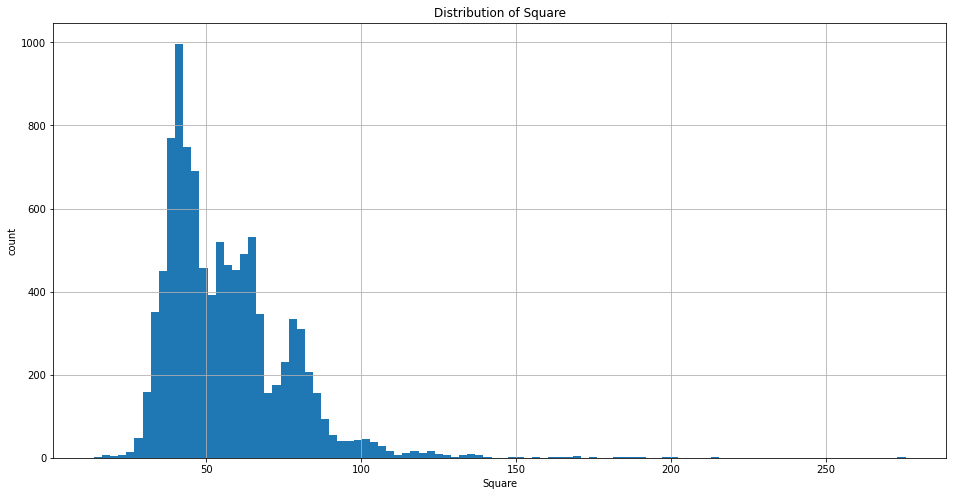

In [12]:
plt.figure(figsize = (16, 8))

df_train['Square'].hist(bins=100)
plt.ylabel('count')
plt.xlabel('Square')

plt.title('Distribution of Square')
plt.show()

In [13]:
#посмотрим данные KitchenSquare - площадь кухни
df_train['KitchenSquare'].value_counts()
df_train['KitchenSquare'].sort_values().unique()
#есть выбросы

array([0.000e+00, 1.000e+00, 2.000e+00, 3.000e+00, 4.000e+00, 5.000e+00,
       6.000e+00, 7.000e+00, 8.000e+00, 9.000e+00, 1.000e+01, 1.100e+01,
       1.200e+01, 1.300e+01, 1.400e+01, 1.500e+01, 1.600e+01, 1.700e+01,
       1.800e+01, 1.900e+01, 2.000e+01, 2.100e+01, 2.200e+01, 2.300e+01,
       2.500e+01, 2.600e+01, 2.700e+01, 2.900e+01, 3.000e+01, 3.100e+01,
       3.200e+01, 3.500e+01, 3.600e+01, 3.700e+01, 3.900e+01, 4.000e+01,
       4.100e+01, 4.200e+01, 4.300e+01, 4.800e+01, 5.100e+01, 5.300e+01,
       5.400e+01, 5.800e+01, 6.000e+01, 6.200e+01, 6.300e+01, 6.600e+01,
       7.200e+01, 7.300e+01, 7.500e+01, 7.800e+01, 8.400e+01, 9.600e+01,
       1.120e+02, 1.230e+02, 1.970e+03, 2.014e+03])

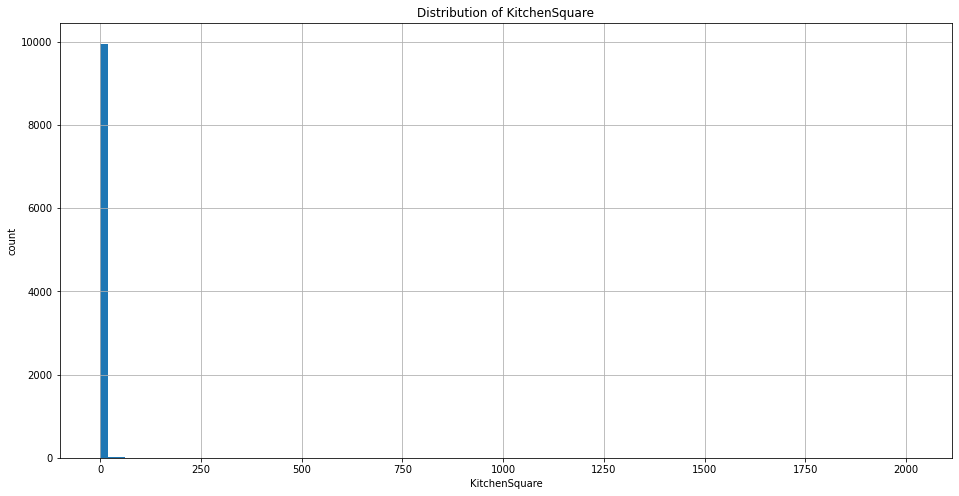

In [14]:
plt.figure(figsize = (16, 8))

df_train['KitchenSquare'].hist(bins=100)
plt.ylabel('count')
plt.xlabel('KitchenSquare')

plt.title('Distribution of KitchenSquare')
plt.show()

In [15]:
#присвоим выбросам значения медиан
KitchenSquare_median = df_train['KitchenSquare'].median()
df_train.loc[df_train['KitchenSquare'] < 10, 'KitchenSquare'] = KitchenSquare_median
df_train.loc[df_train['KitchenSquare'] > 200, 'KitchenSquare'] = KitchenSquare_median

df_train['KitchenSquare'].sort_values().unique()

array([  6.,  10.,  11.,  12.,  13.,  14.,  15.,  16.,  17.,  18.,  19.,
        20.,  21.,  22.,  23.,  25.,  26.,  27.,  29.,  30.,  31.,  32.,
        35.,  36.,  37.,  39.,  40.,  41.,  42.,  43.,  48.,  51.,  53.,
        54.,  58.,  60.,  62.,  63.,  66.,  72.,  73.,  75.,  78.,  84.,
        96., 112., 123.])

In [ ]:
#посмотрим данные Floor - этаж
df_train['Floor'].value_counts()

#на первый взгляд всё нормально

In [16]:
#посмотрим данные HouseYear - год постройки дома
df_train['HouseYear'].value_counts()

#есть странные данные
df_train['HouseYear'].sort_values().unique()

#присвоим выбросам значения медиан
HouseYear_median = df_train['HouseYear'].median()

df_train.loc[df_train['HouseYear'] > 2021, 'HouseYear'] = HouseYear_median

df_train['HouseYear'].sort_values().unique()

array([1910, 1912, 1914, 1916, 1917, 1918, 1919, 1928, 1929, 1930, 1931,
       1932, 1933, 1934, 1935, 1936, 1937, 1938, 1939, 1940, 1941, 1942,
       1947, 1948, 1950, 1951, 1952, 1953, 1954, 1955, 1956, 1957, 1958,
       1959, 1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969,
       1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980,
       1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991,
       1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002,
       2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013,
       2014, 2015, 2016, 2017, 2018, 2019, 2020])

In [17]:
# проверим есть ли пустые данные

df_train.isna().sum()

DistrictId       0
Square           0
LifeSquare       0
KitchenSquare    0
Floor            0
HouseFloor       0
HouseYear        0
Ecology_1        0
Ecology_3        0
Social_1         0
Social_2         0
Social_3         0
Healthcare_1     0
Helthcare_2      0
Shops_1          0
Shops_2          0
Price            0
dtype: int64

In [18]:
#сформируем массив X
X = df_train.drop(columns='Price')

X.info()
#пропущенных данных нет

#сформируем массив y

y = df_train['Price']

y

#разобьём датафреймы на тренировочные и тестовые

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 0 to 9999
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   DistrictId     10000 non-null  int64  
 1   Square         10000 non-null  float64
 2   LifeSquare     10000 non-null  float64
 3   KitchenSquare  10000 non-null  float64
 4   Floor          10000 non-null  int64  
 5   HouseFloor     10000 non-null  float64
 6   HouseYear      10000 non-null  int64  
 7   Ecology_1      10000 non-null  float64
 8   Ecology_3      10000 non-null  int64  
 9   Social_1       10000 non-null  int64  
 10  Social_2       10000 non-null  int64  
 11  Social_3       10000 non-null  int64  
 12  Healthcare_1   10000 non-null  float64
 13  Helthcare_2    10000 non-null  int64  
 14  Shops_1        10000 non-null  int64  
 15  Shops_2        10000 non-null  int64  
dtypes: float64(6), int64(10)
memory usage: 1.3 MB


In [ ]:
#создадим модель линейной регрессии
#from sklearn.linear_model import LinearRegression
#lr = LinearRegression()

#обучение модели
#lr.fit(X_train, y_train)

#y_pred = lr.predict(X_test)   #предсказание данных
#check_test = pd.DataFrame({'y_test': y_test,
 #                         'y_pred': y_pred.flatten()},
  #                        columns=['y_test', 'y_pred'])

#check_test.head(10)     #сравним тестовую выборку и предсказанные данные

#Вычислим R2 полученных предказаний
#r2_score(y_test, y_pred)

In [ ]:
#обучим модель  Random Forest

#создадим модель
#model_rf = RandomForestRegressor(n_estimators=1000,
 #                             max_depth=12,
  #                            random_state=42)

#обучение модели
#model_rf.fit(X_train, y_train)

#y_pred = model_rf.predict(X_test)   #предсказание данных
#check_test = pd.DataFrame({'y_test': y_test,
 #                         'y_pred': y_pred.flatten()},
  #                        columns=['y_test', 'y_pred'])

#check_test.head(10)     #сравним тестовую выборку и предсказанные данные


#Вычислим R2 полученных предказаний
#r2_score(y_test, y_pred)

In [19]:
#Gradient Boosting Regressor model fit and predict for train dataset

gb_model = GradientBoostingRegressor(criterion='mse',
                                     max_depth=6,
                                     min_samples_leaf=50,
                                     random_state=42,  
                                     n_estimators=2250, 
                                     max_features='sqrt', 
                                     loss='huber', 
                                     learning_rate=0.025)
#обучение модели
gb_model.fit(X_train, y_train)

y_pred = gb_model.predict(X_test)   #предсказание данных

check_test = pd.DataFrame({'y_test': y_test,
                          'y_pred': y_pred.flatten()},
                          columns=['y_test', 'y_pred'])

check_test.head(10)     #сравним тестовую выборку и предсказанные данные


#Вычислим R2 полученных предказаний
r2_score(y_test, y_pred)


/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py:475: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py:363: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py:363: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py:363: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py:363: FutureWarning: C

0.7657420962183931

In [ ]:
#XGBR model model fit and predict for train dataset

#gb_model = xgb.XGBRegressor(colsample_bytree=0.4445, 
 #                           learning_rate=0.015, max_depth=6,
  #                           min_child_weight=0.1, 
   #                          n_estimators=1000,
    #                         reg_lambda=0.6,
     #                        random_state =7)

   #обучение модели                          
#gb_model.fit(X_train, y_train)


#y_pred = gb_model.predict(X_test)   #предсказание данных

#check_test = pd.DataFrame({'y_test': y_test,
 #                         'y_pred': y_pred.flatten()},
   #                       columns=['y_test', 'y_pred'])

#check_test.head(10)     #сравним тестовую выборку и предсказанные данные


#Вычислим R2 полученных предказаний
#r2_score(y_test, y_pred)


Первая модель дала результат 0.48 (LinearRegression)

Вторая модель дала результат 0.73 ( RandomForestRegressor)

Вывод:

в данному случае более эффективна модель RandomForestRegressor

Если удалить строки с комнатами = 0, 10 и 19, то получим -587.1949 и 0.7243
Удалять строки с номерами комнат НЕЖЕЛАТЕЛЬНО!!!

Если удалить строки с комнатами = 0, присвоить 1, а те кторые >6 присвоить значение медианы, то получим 0.5109 и 0.7324
ОТЛИЧНЫЙ ВАРИАНТ!!!

Если в строки с комнатами = 0, присвоить 1, а те которые >7 присвоить значение медианы, то получим 0.5091 и 0.7324
ПРЕДЫДУЩИЙ ВАРИАНТ ЛУЧШЕ !!!

После замены данных в трёх столбцах (А и В) на 0 и 1 соответственно, то получим 0.5171 и 0.7328
ОТЛИЧНЫЙ ВАРИАНТ!!!

Если убрать выбросы в столбце с данными по  площади (от 10 до 150), то получим 0.5430 и 0.72706
Трогать данные по  площади НЕЖЕЛАТЕЛЬНО!!!

Если убрать выбросы в столбце с данными по  площади (от 10 до 200), то получим 0.54456 и 0.73015
Трогать данные по  площади НЕЖЕЛАТЕЛЬНО!!!

Если убрать выбросы в столбце с данными по  площади (от 10 до 400), то получим 0.5439 и 0.73185
Трогать данные по  площади НЕЖЕЛАТЕЛЬНО!!!

Если убрать выбросы в столбце с данными по дате постройки дома (>2021), то получим 0.5447 и 0.73197
ОТЛИЧНЫЙ ВАРИАНТ!!!

Если удалить строки с отсутствующими данными, то получим -0.4893 и 0.69389
НЕЖЕЛАТЕЛЬНО!!!

Если удалить выбросы в колонке Жилая площадь, то получим 0.5447 и 0.73197
ОТЛИЧНЫЙ ВАРИАНТ!!!

Добавил ещё две новые модели. В итоге:
LinearRegression   0.5447
RandomForest       0.7319
GradientBoosting   0.7616
XGBR model         0.7564

После удаления столбца Id. В итоге:
LinearRegression   0.5449
RandomForest       0.7330
GradientBoosting   0.7670
XGBR model         0.7542

После удаления столбцы HouseYear. В итоге:
LinearRegression   0.5441
RandomForest       0.7293
GradientBoosting   0.7569
XGBR model         0.7431

Не трогаем данные в столбце Square. В итоге:
LinearRegression   0.5166
RandomForest       0.7336
GradientBoosting   0.7639
XGBR model         0.7563

Не удаляем столбцы HouseYear. В итоге:
LinearRegression   0.5166
RandomForest       0.7336
GradientBoosting   0.7639
XGBR model         0.7563

Нормализуем значения в столбцах ['Square', 'LifeSquare', 'Social_2']. В Итоге:
LinearRegression   0.5166
RandomForest       0.7336
GradientBoosting   0.7639
XGBR model         0.7563

Заменим пропущенные данные в LifeSquare Healthcare_1 на соответствующие медианы?НЕЖЕЛАТЕЛЬНО!!!
LinearRegression   0.5151
RandomForest       0.7303
GradientBoosting   0.7617
XGBR model         0.7537

Удалим столбцы KitchenSquare, HouseYear, HouseYear   . В итоге:НЕЖЕЛАТЕЛЬНО!!!
LinearRegression   0.5120
RandomForest       0.7141
GradientBoosting   0.7483
XGBR model         0.7301

С помощью RF найдём пропущенные значения в Healthcare_1   . В итоге:ПОЛОЖИТЕЛЬНЫЙ РЕЗУЛЬТАТ!!!
LinearRegression   0.5193
RandomForest       0.7299
GradientBoosting   0.7584
XGBR model         0.7525

С помощью RF найдём пропущенные значения в LifeSquare     . В итоге:ОТРИЦАТЕЛЬНЫЙ РЕЗУЛЬТАТ!!!
LinearRegression   0.3877
RandomForest       0.7296
GradientBoosting   0.7578
XGBR model         0.7550


Снова пробуем удалить HouseYear     . В итоге:ОТРИЦАТЕЛЬНЫЙ РЕЗУЛЬТАТ!!!
LinearRegression   0.3877
RandomForest       0.7266
GradientBoosting   0.7475
XGBR model         0.7432

Снова пробуем удалить Id     . В итоге:ПОЛОЖИТЕЛЬНЫЙ РЕЗУЛЬТАТ!!!
LinearRegression   0.3911
RandomForest       0.7300
GradientBoosting   0.7606
XGBR model         0.7534

убрать выбросы HouseYear     . В итоге:ПОЛОЖИТЕЛЬНЫЙ РЕЗУЛЬТАТ!!!
LinearRegression   0.3942
RandomForest       0.7302
GradientBoosting   0.7613
XGBR model         0.7533

убрать выбросы Rooms     . В итоге:ОТРИЦАТЕЛЬНЫЙ РЕЗУЛЬТАТ!!!
LinearRegression   0.4223
RandomForest       0.7302
GradientBoosting   0.7606
XGBR model         0.7539

удалить Rooms     . В итоге:ПОЛОЖИТЕЛЬНЫЙ РЕЗУЛЬТАТ!!!
LinearRegression   0.3856
RandomForest       0.7321
GradientBoosting   0.7617
XGBR model         0.7564

Отказываемся от модели линейной регрессии

убрать выбросы Square. В итоге:ПОЛОЖИТЕЛЬНЫЙ РЕЗУЛЬТАТ!!!
RandomForest       0.7308
GradientBoosting   0.7633
XGBR model         0.7568

удалить Social_1     . В итоге:ОТРИЦАТЕЛЬНЫЙ РЕЗУЛЬТАТ!!!
RandomForest       0.7286
GradientBoosting   0.7625
XGBR model         0.7557

удалить Ecology_2     . В итоге:ПОЛОЖИТЕЛЬНЫЙ РЕЗУЛЬТАТ!!!
RandomForest       0.7304
GradientBoosting   0.7649
XGBR model         0.7566

удалить KitchenSquare     . В итоге:ОТРИЦАТЕЛЬНЫЙ РЕЗУЛЬТАТ!!!
RandomForest       0.7271
GradientBoosting   0.7645
XGBR model         0.7551

убрать выбросы LifeSquare.     . В итоге:ОТРИЦАТЕЛЬНЫЙ РЕЗУЛЬТАТ!!!
RandomForest       0.7308
GradientBoosting   0.7642
XGBR model         0.7565

убрать выбросы KitchenSquare.     . В итоге:ПОЛОЖИТЕЛЬНЫЙ РЕЗУЛЬТАТ!!!
RandomForest       0.7300
GradientBoosting   0.7657
XGBR model         0.7571

8. Прогнозирование на тестовом датасете

Выполнить для тестового датасета те же этапы обработки и построeния признаков
Не потерять и не перемешать индексы от примеров при построении прогнозов
Прогнозы должны быть для всех примеров из тестового датасета (для всех строк)

In [25]:
#загрузим датасет по которому будем делать предсказания

df_test = pd.read_csv(TEST_DATASET_PATH)
df_test

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2
0,4567,44,1.0,36.847630,19.094182,5.0,5,9.0,1970,0.036122,B,B,24,4378,0,1036.0,1,1,B
1,5925,62,1.0,42.493907,42.568133,10.0,7,17.0,2017,0.072158,B,B,2,629,1,NaN,0,0,A
2,960,27,2.0,59.463678,NaN,9.0,19,19.0,1977,0.211401,B,B,9,1892,0,NaN,0,1,B
3,3848,23,3.0,49.646030,33.893825,6.0,2,2.0,1965,0.014073,B,B,2,475,0,NaN,0,0,B
4,746,74,1.0,53.837056,NaN,1.0,8,17.0,1977,0.309479,B,B,35,7715,4,990.0,0,6,B
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,10379,29,2.0,43.177521,30.339945,5.0,6,5.0,1962,0.069660,B,B,31,6119,4,NaN,1,2,B
4996,16138,38,3.0,93.698122,94.521465,10.0,21,27.0,2018,0.060753,B,B,15,2787,2,520.0,0,7,B
4997,3912,101,1.0,33.656723,19.003259,5.0,2,5.0,1966,0.038693,B,B,28,6533,1,1015.0,2,5,B
4998,5722,10,1.0,38.635155,20.976257,9.0,8,14.0,1970,0.089040,B,B,33,7976,5,NaN,0,11,B


In [21]:
#загрузим форму для предсказаний

submit = pd.read_csv(SAMPLE_SUBMITION_PATH)
submit.head()

,Id,Price
0,4567,200000.0
1,5925,200000.0
2,960,200000.0
3,3848,200000.0
4,746,200000.0


In [26]:
#заменим категорийные значения колонок с буквенных значений на цифровые
binary_to_numbers = {'A': 0, 'B': 1}

df_test['Ecology_2'] = df_test['Ecology_2'].replace(binary_to_numbers)
df_test['Ecology_3'] = df_test['Ecology_3'].replace(binary_to_numbers)
df_test['Shops_2'] = df_test['Shops_2'].replace(binary_to_numbers)
#X_test = df_test

In [27]:
#избавимся от пропусков данных в столбце Healthcare_1

# создадим df_drop, по которой будем потом соединять файлы,  
df_drop_test = df_test[['Id', 'LifeSquare']]

target_name = 'Healthcare_1'
df_test.drop(['LifeSquare'], axis=1, inplace=True)

#df_drop.head()

#введём новую колонку 'nan' по которой разделим файл на две части
df_test['nan'] = 0
df_test.loc[df_test['Healthcare_1'].isna(), 'nan'] =1

#один файл будет с значениями Healthcare_1, а другой с пропусками
df_test1 = df_test[df_test['nan'] ==1]
df_train1 = df_test[df_test['nan'] ==0]

X = df_train1.drop(columns=[target_name])
y = df_train1[target_name]

#обучим модель  Random Forest

#создадим модель
model_rf = RandomForestRegressor(random_state=21, criterion='mse')

#обучение модели на полных данных
model_rf.fit(X, y)

df_test1 = df_test1.drop(columns=target_name)
#предсказание данных
df_test1[target_name] = model_rf.predict(df_test1)

df_test1 = df_test1.drop(columns='nan')

#переведём полученные значения Healthcare_1 в целые числа
df_test1[target_name] = df_test1[target_name].apply(int)
#df_test1.head()

#объединим полученные результаты в общий файл с данными
df_train1 = df_train1.drop(columns='nan')
df2_merged = pd.merge(df_test1, df_train1, how='outer') 
df3_merged = pd.merge(df_drop_test, df2_merged, how='left')

#расположим столбцы в первоначальном порядке
df_test = df3_merged.reindex(columns=['Id', 'DistrictId', 'Rooms', 'Square', 'LifeSquare', 'KitchenSquare', 'Floor', 'HouseFloor', 'HouseYear', 'Ecology_1', 'Ecology_2', 'Ecology_3', 'Social_1', 'Social_2', 'Social_3', 'Healthcare_1', 'Helthcare_2', 'Shops_1', 'Shops_2'])


/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


In [28]:
#избавимся от пропусков данных в столбце LifeSquare

# создадим df_drop, по которой будем потом соединять файлы,  
df_drop_test = df_test[['Id', 'Healthcare_1']]

target_name = 'LifeSquare'
df_test.drop(['Healthcare_1'], axis=1, inplace=True)

#введём новую колонку 'nan' по которой разделим файл на две части
df_test['nan'] = 0
df_test.loc[df_test['LifeSquare'].isna(), 'nan'] =1

#один файл будет с значениями LifeSquare, а другой с пропусками
df_test1 = df_test[df_test['nan'] ==1]
df_train1 = df_test[df_test['nan'] ==0]

X = df_train1.drop(columns=[target_name])
y = df_train1[target_name]

#обучим модель  Random Forest

#создадим модель
model_rf = RandomForestRegressor(random_state=21, criterion='mse')

#обучение модели на полных данных
model_rf.fit(X, y)

df_test1 = df_test1.drop(columns=target_name)
#предсказание данных
df_test1[target_name] = model_rf.predict(df_test1)

df_test1 = df_test1.drop(columns='nan')

#переведём полученные значения Healthcare_1 в целые числа
#df_test1[target_name] = df_test1[target_name].apply(int)
#df_test1.head()

#объединим полученные результаты в общий файл с данными
df_train1 = df_train1.drop(columns='nan')
df2_merged = pd.merge(df_test1, df_train1, how='outer') 
df3_merged = pd.merge(df_drop_test, df2_merged, how='left')

#расположим столбцы в первоначальном порядке
df_test = df3_merged.reindex(columns=['Id', 'DistrictId', 'Rooms', 'Square', 'LifeSquare', 'KitchenSquare', 'Floor', 'HouseFloor', 'HouseYear', 'Ecology_1', 'Ecology_2', 'Ecology_3', 'Social_1', 'Social_2', 'Social_3', 'Healthcare_1', 'Helthcare_2', 'Shops_1', 'Shops_2'])

/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


In [29]:
df_test.head()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2
0,4567,44,1.0,36.847630,19.094182,5.0,5,9.0,1970,0.036122,1,1,24,4378,0,1036.0,1,1,1
1,5925,62,1.0,42.493907,42.568133,10.0,7,17.0,2017,0.072158,1,1,2,629,1,404.0,0,0,0
2,960,27,2.0,59.463678,42.824735,9.0,19,19.0,1977,0.211401,1,1,9,1892,0,538.0,0,1,1
3,3848,23,3.0,49.646030,33.893825,6.0,2,2.0,1965,0.014073,1,1,2,475,0,207.0,0,0,1
4,746,74,1.0,53.837056,35.575769,1.0,8,17.0,1977,0.309479,1,1,35,7715,4,990.0,0,6,1


In [30]:
#Проверим  пропущенныe данные

df_test.isna().sum()



#X_test.info()
#пропущенных данных нет

Id               0
DistrictId       0
Rooms            0
Square           0
LifeSquare       0
KitchenSquare    0
Floor            0
HouseFloor       0
HouseYear        0
Ecology_1        0
Ecology_2        0
Ecology_3        0
Social_1         0
Social_2         0
Social_3         0
Healthcare_1     0
Helthcare_2      0
Shops_1          0
Shops_2          0
dtype: int64

In [31]:
# Удалим  "Id", "Rooms", "Ecology_2"

df_test = df_test.drop(columns='Id')
df_test = df_test.drop(columns='Rooms')
X_test = df_test.drop(columns='Ecology_2')




In [32]:
predictions = gb_model.predict(X_test)
predictions

array([168702.77817024, 130422.82641047, 140854.66660188, ...,
       153817.71172726, 195823.78029488, 316547.89292219])

In [33]:
submit['Price'] = predictions
submit.head()

,Id,Price
0,4567,168702.778170
1,5925,130422.826410
2,960,140854.666602
3,3848,107151.724400
4,746,216292.266552


In [34]:
submit.to_csv('rf_submit.csv', index=False)